## Candidate Model 7 - Decision Tree with smote and tomek

In [ ]:
# in this model we combined decision tree with smote and tomek
# we think this model is a good balance between reducing costs, with a low false positive rate
# while also able to detect some true postives

# in this case we feel that the low AUC score is not relevant as we are simply looking for a balanced
# model in this case in order to maximise gain while reducing costs

In [ ]:
from sklearn import tree

In [ ]:
tr = tree.DecisionTreeClassifier().fit(X_train_tk_sm, y_train_tk_sm)

In [ ]:
y_pred_tr = tr.predict(X_test)

In [ ]:
accuracy_score(y_test ,y_pred_kn)


0.7022222222222222

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred_kn, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.957236,0.077316,0.702222,0.517276,0.910796
recall,0.717693,0.424561,0.702222,0.571127,0.702222
f1-score,0.820335,0.130811,0.702222,0.475573,0.783944
support,5115.000000,285.000000,0.702222,5400.000000,5400.000000


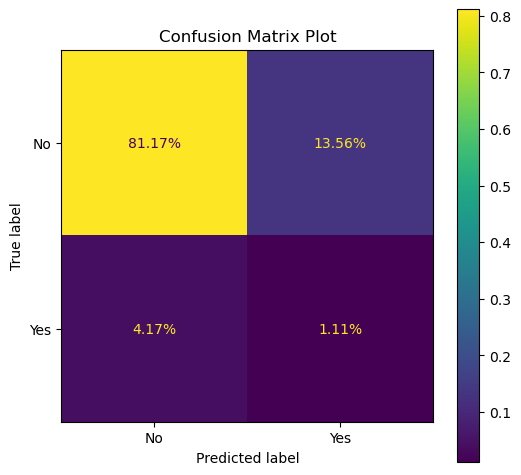

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(tr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

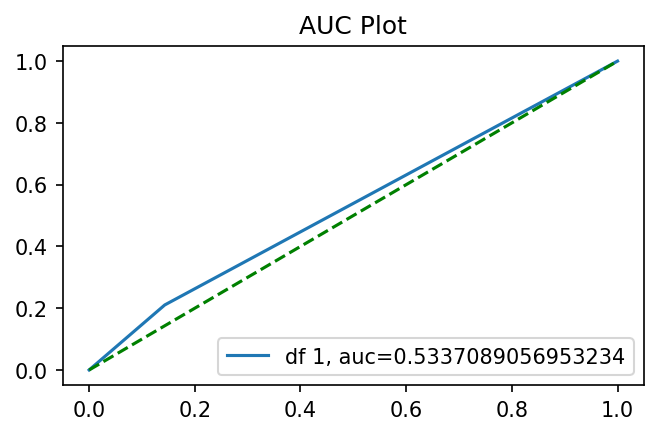

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = tr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='df 1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 8
### dropping average_balance
### with n_nearest neighbours

In [ ]:
x_full_2 = x_full.drop(['q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full_2, y, test_size=0.3, random_state=100)

In [ ]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [ ]:
y_train_tk.value_counts()

No     11515
Yes      738
Name: offer_accepted, dtype: int64

In [ ]:
X_train_tk_sm, y_train_tk_sm = smote.fit_resample(X_train_tk, y_train_tk)

In [ ]:
kn = KNeighborsClassifier(n_neighbors=5, p=3)
kn.fit(X_train_tk_sm, y_train_tk_sm)
y_pred_kn = kn.predict(X_test)

In [ ]:
accuracy_score(y_test ,y_pred_kn)


0.7253703703703703

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred_kn, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.956740,0.079354,0.72537,0.518047,0.910434
recall,0.743695,0.396491,0.72537,0.570093,0.725370
f1-score,0.836872,0.132241,0.72537,0.484556,0.799683
support,5115.000000,285.000000,0.72537,5400.000000,5400.000000


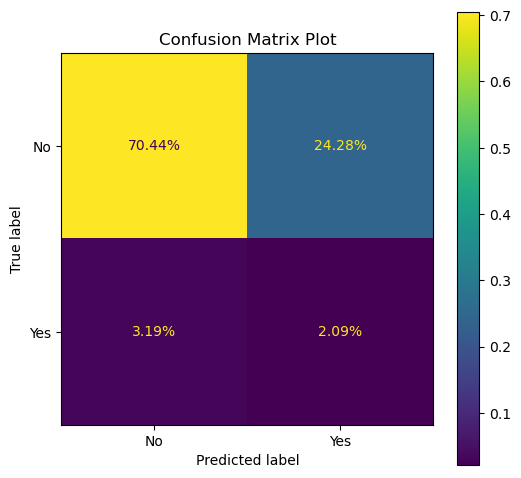

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(kn, X_test, y_test, ax=ax, normalize='all', values_format='.2%');

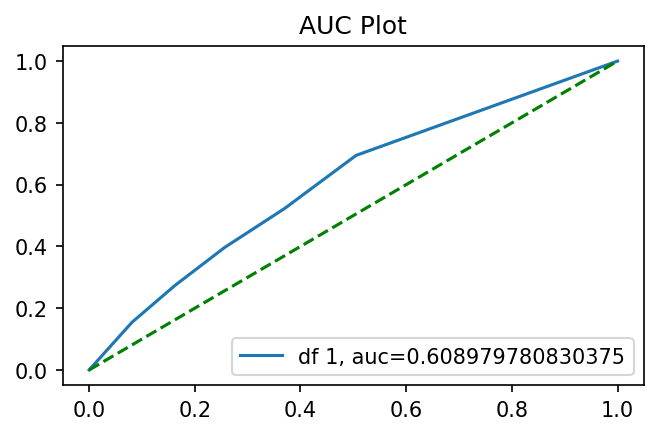

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = kn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='df 1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);